In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

# Importing the train dataset

In [3]:
df=pd.read_csv("trainhousing.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In the above code we could see that there are missing values in the rows.
the dataset is provided by the client.
It has 1168 rows and 81 columns.
saleprice is the output variable.
all other variables are the independent variables.

In [5]:
df.dtypes #data type of each column.

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
for i in df.columns:  #checking out the unique values of each column.
    if df[i].dtypes== object:
        print(df[i].value_counts())
        print("----------")
    else:
        pass

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
----------
Pave    1164
Grvl       4
Name: Street, dtype: int64
----------
Grvl    41
Pave    36
Name: Alley, dtype: int64
----------
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
----------
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
----------
AllPub    1168
Name: Utilities, dtype: int64
----------
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
----------
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
----------
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV 

In [8]:
df.isnull().sum()  #checking out the null values in each column.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

we colud see the presence of null values replacing these null values with mean/median/mode.

# Data Preprocessing

In [9]:
df['LotFrontage'].mean()

70.98846960167715

In [10]:
df['LotFrontage'].fillna(70.98,inplace=True) #replacing with mean value

In [13]:
df['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [14]:
df['Alley'].fillna('Grvl',inplace=True) #replacing nan with mode value.

In [38]:
df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [39]:
df['MasVnrType'].fillna('None',inplace=True) #replacing nan with none value.

In [43]:
df['MasVnrArea'].mean()

102.31007751937985

In [44]:
df['MasVnrArea'].fillna('102.31',inplace=True) #replacing nan with mean value.

In [49]:
df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [50]:
df['BsmtQual'].fillna('TA',inplace=True) #replacing nan with mode value.

In [52]:
df['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [53]:
df['BsmtCond'].fillna('TA',inplace=True) #replacing nan with mode value.

In [55]:
df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [56]:
df['BsmtExposure'].fillna('No',inplace=True) #replacing nan with mode value.

In [58]:
df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [59]:
df['BsmtFinType1'].fillna('Unf',inplace=True) #replacing nan with mode value

In [63]:
df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [64]:
df['BsmtFinType2'].fillna('Unf',inplace=True)  #replacing nan with mode value

In [89]:
df['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [90]:
df['FireplaceQu'].fillna('Gd',inplace=True) #replacing nan with mode value.

In [92]:
df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [93]:
df['GarageType'].fillna('Attchd',inplace=True) #replacing nan with mode value.

In [95]:
df['GarageYrBlt'].dtypes

dtype('float64')

In [97]:
df['GarageYrBlt'].mean()

1978.1938405797102

In [98]:
df['GarageYrBlt'].fillna(1978,inplace=True) #replacing nan with mode value.

In [100]:
df['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [101]:
df['GarageFinish'].fillna('Unf',inplace=True) #replacing nan with mode value.

In [105]:
df['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [106]:
df['GarageQual'].fillna('TA',inplace=True) #replacing nan with mode value.

In [108]:
df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [109]:
df['GarageCond'].fillna('TA',inplace=True) #replacing nan with mode value

In [123]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [124]:
df['PoolQC'].fillna('Gd',inplace=True) #replacing nan with mode value

In [125]:
df['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [126]:
df['Fence'].fillna('MnPrv',inplace=True)  #replacing nan with mode value

In [127]:
df['MiscFeature'].value_counts()

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

In [128]:
df['MiscFeature'].fillna('Shed',inplace=True)  #replacing nan with mode value.

# Label Encoding

In [130]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int32  
 6   Alley          1168 non-null   int32  
 7   LotShape       1168 non-null   int32  
 8   LandContour    1168 non-null   int32  
 9   Utilities      1168 non-null   int32  
 10  LotConfig      1168 non-null   int32  
 11  LandSlope      1168 non-null   int32  
 12  Neighborhood   1168 non-null   int32  
 13  Condition1     1168 non-null   int32  
 14  Condition2     1168 non-null   int32  
 15  BldgType       1168 non-null   int32  
 16  HouseStyle     1168 non-null   int32  
 17  OverallQual    1168 non-null   int64  
 18  OverallC

all the object datatype has been converted to integer.

In [224]:
df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,3.013699,70.986918,10484.749144,0.996575,0.030822,1.938356,2.773973,0.0,...,3.448630,1.994863,3.475171,1.996575,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,416.159877,41.940650,0.633120,22.437056,8957.442311,0.058445,0.172909,1.412262,0.710027,0.0,...,44.896939,0.092426,1.112090,0.092505,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,360.500000,20.000000,3.000000,60.000000,7621.500000,1.000000,0.000000,0.000000,3.000000,0.0,...,0.000000,2.000000,4.000000,2.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,714.500000,50.000000,3.000000,70.980000,9522.500000,1.000000,0.000000,3.000000,3.000000,0.0,...,0.000000,2.000000,4.000000,2.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,1079.500000,70.000000,3.000000,79.250000,11515.500000,1.000000,0.000000,3.000000,3.000000,0.0,...,0.000000,2.000000,4.000000,2.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,1460.000000,190.000000,4.000000,313.000000,164660.000000,1.000000,1.000000,3.000000,3.000000,0.0,...,738.000000,2.000000,4.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


From the above statistical Description, Mean, Standard Deviation, minimum and maximum values, Median, Average and 75% has been calculated from where we can predict the presence of outliers, skewness and the missing values in the dataset. Minimum and maximum values in a particular is also visible.



In [132]:
df.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710591
LotArea          10.659285
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 81, dtype: float64

We could see that data is skewed.

Id                  AxesSubplot(0.125,0.808774;0.065678x0.0712264)
MSSubClass       AxesSubplot(0.203814,0.808774;0.065678x0.0712264)
MSZoning         AxesSubplot(0.282627,0.808774;0.065678x0.0712264)
LotFrontage      AxesSubplot(0.361441,0.808774;0.065678x0.0712264)
LotArea          AxesSubplot(0.440254,0.808774;0.065678x0.0712264)
                                       ...                        
MoSold           AxesSubplot(0.597881,0.210472;0.065678x0.0712264)
YrSold           AxesSubplot(0.676695,0.210472;0.065678x0.0712264)
SaleType         AxesSubplot(0.755508,0.210472;0.065678x0.0712264)
SaleCondition    AxesSubplot(0.834322,0.210472;0.065678x0.0712264)
SalePrice              AxesSubplot(0.125,0.125;0.065678x0.0712264)
Length: 81, dtype: object

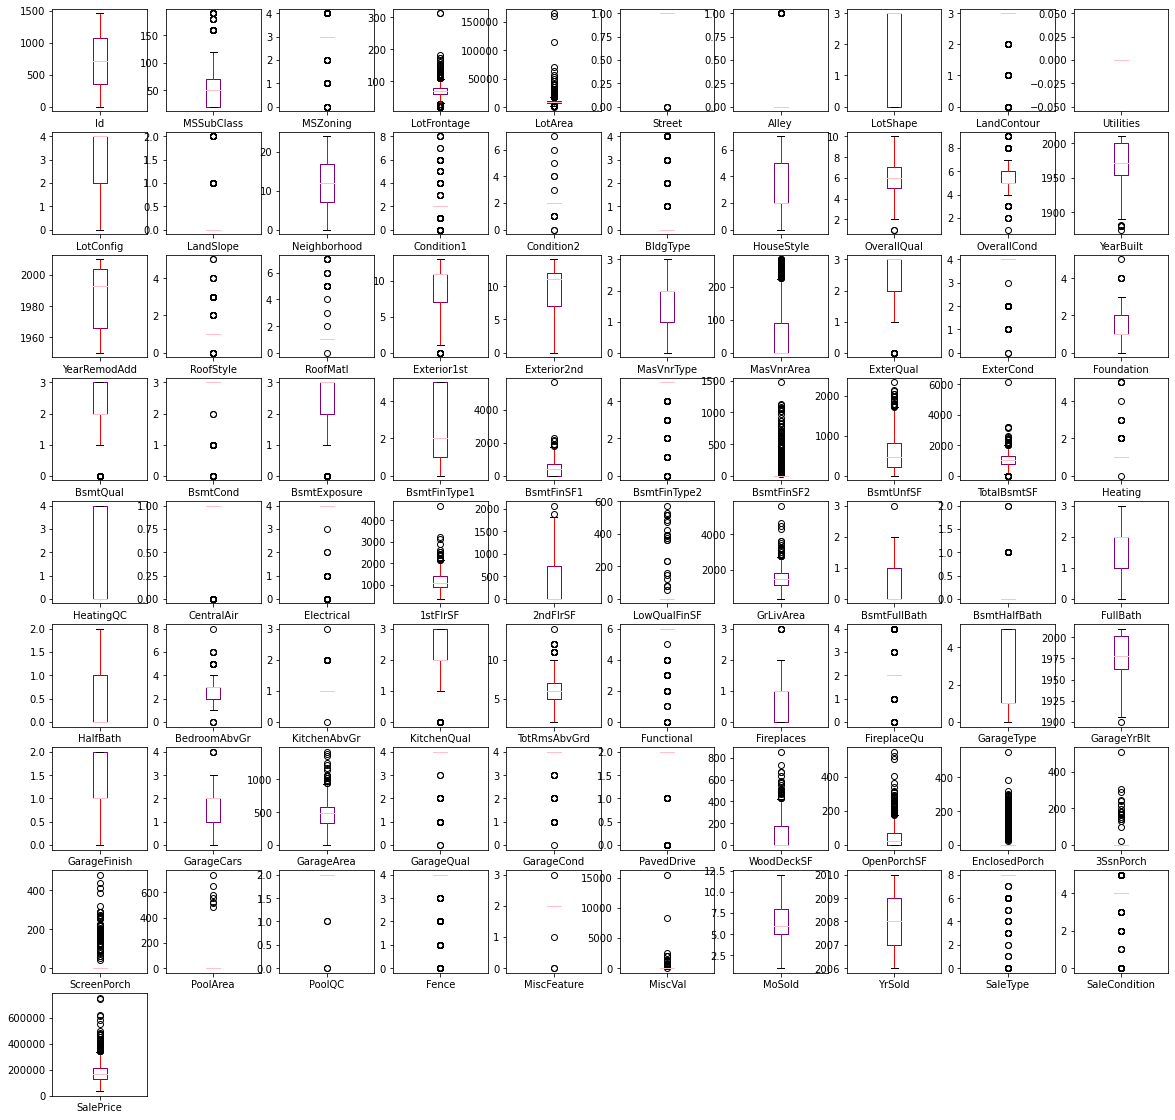

In [138]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(9,10),figsize=(20,20),color=color)

We could see the presence of outliers.

# Dividing the dataset into dependent and independent variables.

In [139]:
x=df.iloc[:,0:-1]  #independent variable
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3,70.98,4928,1,0,0,3,0,...,0,0,2,4,2,0,2,2007,8,4
1,889,20,3,95.00,15865,1,0,0,3,0,...,224,0,2,4,2,0,10,2007,8,4
2,793,60,3,92.00,9920,1,0,0,3,0,...,0,0,2,4,2,0,6,2007,8,4
3,110,20,3,105.00,11751,1,0,0,3,0,...,0,0,2,2,2,0,1,2010,0,4
4,422,20,3,70.98,16635,1,0,0,3,0,...,0,0,2,4,2,0,6,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70.98,9819,1,0,0,3,0,...,0,0,2,2,2,0,2,2010,8,4
1164,554,20,3,67.00,8777,1,0,3,3,0,...,0,0,2,2,2,0,5,2009,8,4
1165,196,160,3,24.00,2280,1,0,3,3,0,...,0,0,2,4,2,0,7,2009,8,4
1166,31,70,0,50.00,8500,1,1,3,3,0,...,0,0,2,2,2,0,7,2008,8,4


In [140]:
y=df['SalePrice']  #dependent variable.
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [145]:
def cal_vif(x):    # calculating variance Inflation Factor
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [146]:
cal_vif(x)

,variables,VIF FACTOR
0,Id,4.316165
1,MSSubClass,14.218151
2,MSZoning,38.448063
3,LotFrontage,19.847110
4,LotArea,4.171697
...,...,...
75,MiscVal,2.844495
76,MoSold,7.058060
77,YrSold,48578.192326
78,SaleType,25.294204


VIF FACTOR has been calculated to check the multicolinearities. There exsists multicolinearties but we will not remove any column as we may end up loosing important information.

In [148]:
from sklearn.preprocessing import power_transform   #to remove skewness
x=power_transform(x,method='yeo-johnson')
x


array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

In [149]:
from sklearn.preprocessing import StandardScaler  #to bring all the necessary variables on same scale.
mn=StandardScaler()
x=mn.fit_transform(x)
x

array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60482475,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60482475,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60482475,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.899557  ,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14805187,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.35902113,
         0.40906852,  0.02973497]])

# Performing ALgorithms

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Linear Regression

In [151]:
minmse=0    #finding the best Random State
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    err=mean_squared_error(y_test,pred)
    if err>minmse:
        minmse=err
        maxrs=i
print("MSE is ",round(minmse,2),"at random state",maxrs)

MSE is  3371444909.58 at random state 77


In [152]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=77)

In [156]:
lr=LinearRegression()
lr.fit(x_train1,y_train1)
#print("Cofficient is:",lr.coef_)
#print("Intercept is: ",lr.intercept_)
sco=lr.score(x_train1,y_train1)
sco1=sco*100
print("Score is: ",sco1)
pred=lr.predict(x_test1)
mse=mean_squared_error(y_test1,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test1,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test1,pred)
print("R2 Score is: ",round(scr,2))
print("rsme",np.sqrt(mse))

Score is:  87.61140472445261
Mean Squared Error is:  3371444909.58
Mean Absolute Error is:  27403.21
R2 Score is:  0.49
rsme 58064.14478470055


# Decision Tree Regression

In [157]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train1,y_train1)
sw1=dtr.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=dtr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  1.0
Mean Squared Error is: 2272838786.94
Mean Absolute Error is: 28989.77
R2 Score is: 0.66
RSME 47674.29901889507


# Support vector Regressor

In [159]:
svr1=SVR(kernel="linear")
svr1.fit(x_train1,y_train1)
sw2=svr1.score(x_train1,y_train1)
#print("Coffecient is: ",svr1.coef_)
#print("Intercept is: ",svr1.intercept_)
print("Score is: ",sw2)
pred=svr1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.09040745663632155
Mean Squared Error is: 6044965824.23
Mean Absolute Error is: 49434.33
R2 Score is: 0.08
RSME 77749.3782883528


# Kneighbors Regressor

In [160]:
knr=KNeighborsRegressor()
knr.fit(x_train1,y_train1)
sw2=knr.score(x_train1,y_train1)
#print("Coffecient is: ",knr.coef_)
#print("Intercept is: ",knr.intercept_)
print("Score is: ",sw2)
pred=knr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.8483682699598958
Mean Squared Error is: 1979139505.53
Mean Absolute Error is: 25238.35
R2 Score is: 0.7
RSME 44487.5207842748


# Random Forest Regressor

In [161]:
rfr=RandomForestRegressor()
rfr.fit(x_train1,y_train1)
sw1=rfr.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=rfr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.9789149311753789
Mean Squared Error is: 1307672572.45
Mean Absolute Error is: 20215.77
R2 Score is: 0.8
RSME 36161.75566049014


# Cross validation

In [162]:
def rmse_cv(model,x_train1,y_train1):
    mse_cv_score=-cross_val_score(model,x_train1,y_train1,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)
    rmse_cv=np.sqrt(mse_cv_score).mean()
    return(rmse_cv)

In [163]:
rmse_cv(lr,x_train1,y_train1) #linear Regression

1.0992960672924816e+17

In [164]:
rmse_cv(rfr,x_train1,y_train1)  #random forest regressor

29914.265597670263

In [165]:
rmse_cv(dtr,x_train1,y_train1)  #decision tree regressor

40208.849392961805

In [166]:
rmse_cv(knr,x_train1,y_train1)  #k neighbors regressor

37644.997928886485

In [167]:
rmse_cv(svr1,x_train1,y_train1)  #support vector regressor

75372.92546542898

# Grid Search CV

In [168]:
parameter={"criterion":["squared_error","absolute_error","poisson"],
          "bootstrap":[True,False],
          "oob_score":[True,False],
          "max_depth":np.arange(2,20),
          "max_features":['auto','sqrt','log2']}

In [169]:
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False]})

In [170]:
gcv.best_params_  #best parameters

{'bootstrap': True,
 'criterion': 'poisson',
 'max_depth': 19,
 'max_features': 'log2',
 'oob_score': False}

# Final model

In [173]:
final=RandomForestRegressor(max_features='log2', bootstrap=True, oob_score=False, max_depth=19)
final.fit(x_train1,y_train1)
sw1=final.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=rfr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.9788391489796187
Mean Squared Error is: 1290796785.95
Mean Absolute Error is: 18840.35
R2 Score is: 0.8
RSME 35927.66045753526


# Saving the model

In [175]:
import joblib
joblib.dump(final,"housing.pkl")

['housing.pkl']

# Importing the dataset

In [176]:
df_test=pd.read_csv("test_housing.csv")

In [177]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [179]:
df_test.dtypes #datatypes of each column

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [180]:
for i in df_test.columns:  #label encoding for each column
    if df_test[i].dtypes== object:
        print(df_test[i].value_counts())
        print("----------")
    else:
        pass

RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
----------
Pave    290
Grvl      2
Name: Street, dtype: int64
----------
Grvl    9
Pave    5
Name: Alley, dtype: int64
----------
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
----------
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64
----------
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64
----------
Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64
----------
Gtl    277
Mod     14
Sev      1
Name: LandSlope, dtype: int64
----------
NAmes      43
CollgCr    32
OldTown    27
Somerst    18
Edwards    17
NridgHt    16
Gilbert    15
Mitchel    15
Timber     14
Sawyer     14
NWAmes     14
BrkSide     8
SawyerW     8
MeadowV     8
IDOTRR      7
Crawfor     6
StoneBr     6
NoRidge     6
BrDale      5
ClearCr     4
SWISU       4
Veenker     2
Blmngtn     2
NPkVill     1
Name: Neighborh

In [181]:
df_test.isnull().sum() #identifing null values in each column

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

# Data preprocessing

 #replacing null values with mean/median/mode

In [186]:
df_test['LotFrontage'].fillna(70.98,inplace=True)

In [187]:
df_test['Alley'].fillna('Grvl',inplace=True)

In [188]:
df_test['MasVnrType'].fillna('None',inplace=True)

In [189]:
df_test['MasVnrArea'].fillna('102.31',inplace=True)

In [190]:
df_test['BsmtQual'].fillna('TA',inplace=True)

In [191]:
df_test['BsmtCond'].fillna('TA',inplace=True)

In [194]:
df_test['BsmtExposure'].fillna('No',inplace=True)

In [195]:
df_test['BsmtFinType1'].fillna('Unf',inplace=True)

In [196]:
df_test['BsmtFinType2'].fillna('Unf',inplace=True)

In [197]:
df_test['FireplaceQu'].fillna('Gd',inplace=True)

In [198]:
df_test['GarageType'].fillna('Attchd',inplace=True)

In [200]:
df_test['GarageFinish'].fillna('Unf',inplace=True)

In [201]:
df_test['GarageYrBlt'].fillna(1978,inplace=True)

In [203]:
df_test['GarageQual'].fillna('TA',inplace=True)

In [204]:
df_test['GarageCond'].fillna('TA',inplace=True)

In [205]:
df_test['PoolQC'].fillna('Gd',inplace=True)

In [206]:
df_test['Fence'].fillna('MnPrv',inplace=True)

In [207]:
df_test['MiscFeature'].fillna('Shed',inplace=True)

# Label Encoding

In [208]:
objList = df_test.select_dtypes(include = "object").columns
print (objList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [209]:
le = LabelEncoder()

for feat in objList:
    df_test[feat] = le.fit_transform(df_test[feat].astype(str))

print (df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    int32  
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    int32  
 6   Alley          292 non-null    int32  
 7   LotShape       292 non-null    int32  
 8   LandContour    292 non-null    int32  
 9   Utilities      292 non-null    int32  
 10  LotConfig      292 non-null    int32  
 11  LandSlope      292 non-null    int32  
 12  Neighborhood   292 non-null    int32  
 13  Condition1     292 non-null    int32  
 14  Condition2     292 non-null    int32  
 15  BldgType       292 non-null    int32  
 16  HouseStyle     292 non-null    int32  
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Dividing the test data data into independent and dependent variable.

In [212]:
x1=df_test
x1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.00,14157,1,0,0,1,0,...,0,0,0,2,1,0,7,2007,5,2
1,1018,120,2,70.98,5814,1,0,0,3,0,...,0,0,0,2,1,0,8,2009,0,0
2,929,20,2,70.98,11838,1,0,3,3,0,...,0,0,0,2,1,0,6,2009,5,2
3,1148,70,2,75.00,12000,1,0,3,0,0,...,0,0,0,2,1,0,7,2009,5,2
4,1227,60,2,86.00,14598,1,0,0,3,0,...,0,0,0,2,1,0,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2,78.00,10206,1,0,3,3,0,...,0,0,0,2,1,0,10,2008,5,2
288,1048,20,2,57.00,9245,1,0,1,3,0,...,0,0,0,2,1,0,2,2008,5,2
289,17,20,2,70.98,11241,1,0,0,3,0,...,0,0,0,2,1,700,3,2010,5,2
290,523,50,3,50.00,5000,1,0,3,3,0,...,0,0,0,2,1,0,10,2006,5,2


In [213]:
from sklearn.preprocessing import power_transform #removing skewness
x1=power_transform(x,method='yeo-johnson')
x1


array([[-0.91997836, -1.15547144, -0.23789662, ..., -0.65013338,
         0.2992528 ,  0.03465097],
       [ 0.56988766,  1.32789304, -0.23789662, ...,  0.8639095 ,
        -3.34166495, -2.69421741],
       [ 0.36214428, -1.15547144, -0.23789662, ...,  0.8639095 ,
         0.2992528 ,  0.03465097],
       ...,
       [-1.71340558, -1.15547144, -0.23789662, ...,  1.6186062 ,
         0.2992528 ,  0.03465097],
       [-0.52923966,  0.27605748,  1.69285867, ..., -1.40952659,
         0.2992528 ,  0.03465097],
       [ 1.43895674,  1.61920234,  1.69285867, ..., -1.40952659,
         0.2992528 ,  0.03465097]])

In [214]:
from sklearn.preprocessing import StandardScaler #brining all the parameters on same scale
mn=StandardScaler()
x11=mn.fit_transform(x)
x

array([[-0.87980725, -1.14976802, -0.28316498, ..., -0.65028987,
         0.29921966,  0.01281114],
       [ 0.62516162,  1.33766595, -0.28316498, ...,  0.8638488 ,
        -3.41487924, -2.55481962],
       [ 0.44864529, -1.14976802, -0.28316498, ...,  0.8638488 ,
         0.29921966,  0.01281114],
       ...,
       [-1.93182777, -1.14976802, -0.28316498, ...,  1.61904342,
         0.29921966,  0.01281114],
       [-0.42344009,  0.262613  ,  1.7993534 , ..., -1.40924184,
         0.29921966,  0.01281114],
       [ 1.30456727,  1.63938246,  1.7993534 , ..., -1.40924184,
         0.29921966,  0.01281114]])

In [215]:
w=final.predict(x1)  #with the best model predicting the price of test dataset
w

array([331066.29      , 205232.7       , 272918.18      , 165953.64      ,
       258329.19      ,  90464.35666667, 147359.26666667, 320814.59      ,
       247948.61      , 175378.02      ,  99999.65      , 151401.32171429,
       130664.5       , 196082.56      , 327905.82      , 125664.68067308,
       129124.76      , 129313.35596744, 171793.48      , 191647.56333333,
       160243.61777778, 154044.5       , 149389.64818182, 113550.22      ,
       107057.11      , 129862.00681159, 182099.05694444, 147939.03333333,
       168254.25      , 111906.78375   , 141038.03      , 191399.48214286,
       242464.12333333, 157757.5       , 120931.88285714, 180102.76666667,
       200448.05909091, 118780.03      , 161390.15625   , 148585.88      ,
       110644.08215829, 310608.15      , 203436.3547619 , 188717.26166667,
       147131.32597826, 136094.59923077, 128365.76541667, 111581.64923077,
       213041.2       , 339888.06      , 151953.26272727, 218331.32      ,
       105804.8114652 , 1

In [217]:
y=pd.DataFrame({}) #storing them on dataframe
y['SalePrice']=w
y

,SalePrice
0,331066.290000
1,205232.700000
2,272918.180000
3,165953.640000
4,258329.190000
...,...
287,250618.940000
288,147337.400978
289,151249.820000
290,150966.916667


In [226]:
y.to_csv("housingsalesprediction.csv")  #saving it in a csv format